In [1]:
import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
estimation_startdate = datetime(2019,6,30)
estimation_enddate = datetime(2020,1,19)

# 'FTSE 100', 'NASDAQ-100', 'S&P 500', 'CAC 40', 'DAX',
#           'Nikkei 225','Hang Seng Index',  'Shanghai Composite Index', 'S&P/ASX 200', 'S&P BSE SENSEX ',
#           'S&P/TSX Composite Index', 'STI Index', 'ESTX 50 PR.EUR','Russell 2000', 'FTSE MIB Index',
#           'S&P/ASX 50', 'Nifty 50', 'OMX Stockholm 30', 'PSI 20', 'Dow Jones Industrial Average',
#           'iShares MSCI World Index ETF', 'KOSPI Composite Index', 'OMX Copenhagen 25', 'TSEC weighted index', 
#            'S&P/NZX 50 INDEX GROSS', 'STXE 600 PR.EUR','BIST 100',
#            'iShares MSCI World Small Cap UCITS ETF ', 'MSCI AC Asia Pacific EX Japan Index FAM Fund Class I EUR Accumulation ',
#             'Vanguard FTSE Developed Europe ex-U.K. Equity Index Fund GBP Acc'

tickers = ['IMOEX.ME','^FTSE','^FCHI','DAX', 'ENY=F', '^HSI', '000001.SS','^AXJO', '^BSESN', 
           '^GSPTSE', '^STI', '^STOXX50E', '^RUT', 'FTSEMIB.MI', '^AFLI', '^NSEI','^OMX',
           'PSI20.LS', '^DJI', 'XWD.TO','^KS11','^OMXC25','^TWII','^NZ50', '^STOXX',
           'XU100.IS', 'WSML.L', '0P0001GY56.F', 'IEUR',  '0P0000KSP8.L']
marketPrices = pdr.get_data_yahoo(tickers, start = estimation_startdate, end = estimation_enddate)["Adj Close"]

[*********************100%***********************]  30 of 30 completed


In [3]:
marketPrices.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,3044.903076,26977.289062,NaN,24.265570,21680.0,21254.0,41.707760,2801.469971,5188.390137,5.1145,...,2129.739990,11865.599609,10464.530273,1642.000000,1141.420044,1566.569946,3372.260010,387.869995,3497.590088,10895.459961
2019-07-02,3043.943115,27107.990234,102.806000,24.301716,21700.0,21393.0,41.761383,2809.810059,5149.160156,5.1185,...,2122.020020,11910.299805,10531.940430,1647.020020,1144.829956,1560.540039,3370.800049,389.290009,3507.979980,10865.120117
2019-07-03,3015.262939,27399.619141,102.629997,24.518618,21700.0,21905.0,42.118858,2823.949951,5180.839844,5.1520,...,2096.020020,11916.750000,10544.429688,1648.839966,1159.660034,1572.119995,3367.800049,392.579987,3540.629883,10743.769531
2019-07-04,3005.249023,27421.509766,102.903000,NaN,NaN,22121.0,NaN,2842.780029,5210.069824,5.1740,...,2108.729980,11946.750000,10558.280273,1652.250000,1153.959961,NaN,3372.250000,392.940002,3544.149902,10775.900391
2019-07-05,3011.059082,27220.640625,103.120003,24.166159,21650.0,21986.0,41.707760,2835.350098,5192.740234,5.1285,...,2110.590088,11811.150391,10615.469727,1634.939941,1141.089966,1575.619995,3366.810059,390.109985,3527.979980,10785.730469
2019-07-08,2933.363037,27162.289062,101.469002,24.148083,21590.0,21976.0,41.511154,2822.550049,5174.520020,5.1165,...,2064.169922,11558.599609,10605.980469,1642.069946,1141.290039,1561.390015,3334.229980,389.899994,3523.760010,10751.219727
2019-07-09,2928.229980,27112.210938,101.155998,24.003479,21500.0,21886.0,41.323483,2822.659912,5153.750000,5.0845,...,2052.030029,11555.900391,10538.110352,1630.880005,1135.180054,1562.589966,3329.459961,387.920013,3509.750000,10702.780273
2019-07-10,2915.302002,27112.589844,101.157997,23.966429,21530.0,22045.0,41.493282,2822.750000,5153.060059,5.1075,...,2058.780029,11498.900391,10650.139648,1622.449951,1138.699951,1565.050049,3340.419922,387.149994,3501.520020,10798.480469
2019-07-11,2917.760986,26972.509766,101.891998,23.876959,21600.0,22169.0,41.448601,2789.659912,5185.689941,5.1095,...,2080.580078,11582.900391,10687.320312,1613.209961,1135.140015,1557.920044,3350.449951,386.700012,3496.729980,10843.419922


In [4]:
marketReturns  = marketPrices.pct_change(1).dropna()
#marketReturns = np.where(int(marketReturns) == 0, )
marketReturns.head()

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-03,-0.009422,0.010758,-0.001712,0.008925,0.000000,0.023933,0.008560,0.005032,0.006152,0.006545,...,-0.012252,0.000542,0.001186,0.001105,0.012954,0.007420,-0.000890,0.008451,0.009307,-0.011169
2019-07-04,-0.003321,0.000799,0.002660,0.000000,0.000000,0.009861,0.000000,0.006668,0.005642,0.004270,...,0.006064,0.002517,0.001314,0.002068,-0.004915,0.000000,0.001321,0.000917,0.000994,0.002991
2019-07-05,0.001933,-0.007325,0.002109,-0.014375,-0.002304,-0.006103,-0.009760,-0.002614,-0.003326,-0.008794,...,0.000882,-0.011350,0.005417,-0.010477,-0.011153,0.002226,-0.001613,-0.007202,-0.004562,0.000912
2019-07-08,-0.025804,-0.002144,-0.016010,-0.000748,-0.002771,-0.000455,-0.004714,-0.004514,-0.003509,-0.002340,...,-0.021994,-0.021382,-0.000894,0.004361,0.000175,-0.009031,-0.009677,-0.000538,-0.001196,-0.003200
2019-07-09,-0.001750,-0.001844,-0.003085,-0.005988,-0.004169,-0.004095,-0.004521,0.000039,-0.004014,-0.006254,...,-0.005881,-0.000234,-0.006399,-0.006815,-0.005354,0.000769,-0.001431,-0.005078,-0.003976,-0.004505


In [5]:
marketReturns["whole market"] = marketReturns.mean(axis = 1)
marketReturns.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-03,-0.009422,0.010758,-0.001712,0.008925,0.000000,0.023933,0.008560,0.005032,0.006152,0.006545,...,0.000542,0.001186,0.001105,0.012954,0.007420,-0.000890,0.008451,0.009307,-0.011169,0.003605
2019-07-04,-0.003321,0.000799,0.002660,0.000000,0.000000,0.009861,0.000000,0.006668,0.005642,0.004270,...,0.002517,0.001314,0.002068,-0.004915,0.000000,0.001321,0.000917,0.000994,0.002991,0.001782
2019-07-05,0.001933,-0.007325,0.002109,-0.014375,-0.002304,-0.006103,-0.009760,-0.002614,-0.003326,-0.008794,...,-0.011350,0.005417,-0.010477,-0.011153,0.002226,-0.001613,-0.007202,-0.004562,0.000912,-0.003645
2019-07-08,-0.025804,-0.002144,-0.016010,-0.000748,-0.002771,-0.000455,-0.004714,-0.004514,-0.003509,-0.002340,...,-0.021382,-0.000894,0.004361,0.000175,-0.009031,-0.009677,-0.000538,-0.001196,-0.003200,-0.006936
2019-07-09,-0.001750,-0.001844,-0.003085,-0.005988,-0.004169,-0.004095,-0.004521,0.000039,-0.004014,-0.006254,...,-0.000234,-0.006399,-0.006815,-0.005354,0.000769,-0.001431,-0.005078,-0.003976,-0.004505,-0.003368
2019-07-10,-0.004415,0.000014,0.000020,-0.001544,0.001395,0.007265,0.004109,0.000032,-0.000134,0.004524,...,-0.004933,0.010631,-0.005169,0.003101,0.001574,0.003292,-0.001985,-0.002345,0.008942,0.001770
2019-07-11,0.000843,-0.005167,0.007256,-0.003733,0.003251,0.005625,-0.001077,-0.011723,0.006332,0.000392,...,0.007305,0.003491,-0.005695,-0.003126,-0.004556,0.003003,-0.001162,-0.001368,0.004162,0.001507
2019-07-12,0.004383,-0.002260,-0.000952,-0.002839,-0.000926,0.000632,0.001078,-0.004330,0.006842,0.005578,...,-0.002625,0.001320,0.007693,-0.009787,0.007754,0.002056,0.000388,0.000257,-0.001759,-0.000075
2019-07-15,0.003972,0.008175,0.003674,0.008541,0.000927,-0.000225,0.001508,-0.007611,0.007441,-0.000779,...,0.003103,-0.003258,0.004484,0.005400,-0.005210,-0.002797,0.002326,0.001312,0.004811,0.001193


In [6]:
Beta = {}
var = marketReturns["whole market"].var()
for col in marketReturns:
    cov = marketReturns[col].cov(marketReturns["whole market"])
    Beta[col] = cov/var
Beta

{'000001.SS': 0.6447838690236125,
 '0P0000KSP8.L': 1.1339695317789686,
 '0P0001GY56.F': 1.1671575525482674,
 'DAX': 1.4016399196647986,
 'ENY=F': 1.244630458937885,
 'FTSEMIB.MI': 1.4892473272487317,
 'IEUR': 1.1724272515122474,
 'IMOEX.ME': 0.7240545005822414,
 'PSI20.LS': 1.1539776692829788,
 'WSML.L': 1.2418646581328079,
 'XU100.IS': 0.7200038221464905,
 'XWD.TO': 0.9370385287633862,
 '^AFLI': 0.6571970665715023,
 '^AXJO': 0.6470025795527288,
 '^BSESN': 0.529673713061707,
 '^DJI': 1.133043482252397,
 '^FCHI': 1.4994605445605536,
 '^FTSE': 1.2595723107394454,
 '^GSPTSE': 0.5937137317592098,
 '^HSI': 1.2362879141950882,
 '^KS11': 0.8836616608368969,
 '^NSEI': 0.5471601044812886,
 '^NZ50': 0.19595497176261262,
 '^OMX': 1.4234267941314327,
 '^OMXC25': 1.0695860301752738,
 '^RUT': 1.2740476720964244,
 '^STI': 0.6644631202955248,
 '^STOXX': 1.3222193688951311,
 '^STOXX50E': 1.4066250115079544,
 '^TWII': 0.6261088335024084,
 'whole market': 1.0000000000000002}

In [7]:
event_startdate = datetime(2020,1,20)
event_enddate = datetime(2020,1,30)
eventPrices = pdr.get_data_yahoo(tickers, start = event_startdate, end = event_enddate)["Adj Close"]
eventPrices
eventPrices.drop('0P0001GY56.F', axis = 1, inplace = True)

[*********************100%***********************]  30 of 30 completed


1 Failed download:
['0P0001GY56.F']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-20 00:00:00 -> 2020-01-30 00:00:00)')


In [8]:
eventReturns = eventPrices.pct_change(1).dropna().iloc[1:]
eventReturns["whole market"] = eventReturns.mean(axis = 1)
eventReturns

,000001.SS,0P0000KSP8.L,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,XU100.IS,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23 00:00:00,-0.027518,-0.007765,-0.006675,-0.001678,0.000042,-0.001806,-0.010527,-0.005523,-0.008969,-0.001686,...,0.006067,0.000961,-0.009013,-0.004064,0.000327,-0.005953,-0.007115,-0.008738,0.0,-0.004976
2020-01-24 00:00:00,0.000000,0.010474,0.001238,-0.006723,0.011052,-0.003417,0.001592,0.009884,0.001357,-0.003251,...,0.005575,-0.001958,0.009702,0.008131,-0.013519,0.001688,0.008595,0.011322,0.0,0.002191
2020-01-27 00:00:00,0.000000,-0.022522,-0.021335,-0.025804,-0.023071,-0.020573,-0.019401,-0.020352,-0.020425,-0.016310,...,-0.010553,-0.005950,-0.022820,-0.023580,-0.010883,0.000000,-0.022590,-0.026810,0.0,-0.014187
2020-01-28 00:00:00,0.000000,0.014106,0.006280,0.013461,0.026136,0.008443,0.009056,0.012441,0.007658,-0.002897,...,-0.005215,-0.010335,0.008394,0.006424,0.008619,-0.018139,0.008429,0.011251,0.0,0.003058
2020-01-29 00:00:00,0.000000,0.002959,-0.000897,-0.003856,0.005702,0.001838,0.005043,0.003057,0.001190,-0.000936,...,0.006113,-0.000736,0.002978,0.014417,-0.005482,0.000415,0.004431,0.004609,0.0,0.001134


In [10]:
non_risk_insterest_rate = 0.0388

abnormalReturns = pd.DataFrame()

for col in marketReturns:
    if col != '0P0001GY56.F':
        abnormalReturns[col] = non_risk_insterest_rate + Beta[col]*(eventReturns[col] - non_risk_insterest_rate) - eventReturns[col]

abnormalReturns

,000001.SS,0P0000KSP8.L,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,XU100.IS,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0.023557,-0.006238,-0.018265,-0.009902,-0.018962,-0.007002,0.013612,-0.006825,-0.011554,0.011336,...,0.014823,0.030424,-0.020245,-0.002983,-0.010544,0.015016,-0.014795,-0.019330,0.014507,-9.540979e-18
2020-01-24,0.013782,-0.003795,-0.015086,-0.011136,-0.013576,-0.007279,0.010267,-0.004452,-0.009056,0.011774,...,0.015046,0.032771,-0.012321,-0.002134,-0.014338,0.012452,-0.009733,-0.011173,0.014507,-5.637851e-18
2020-01-27,0.013782,-0.008215,-0.024153,-0.015804,-0.030270,-0.010238,0.016060,-0.009108,-0.014324,0.015431,...,0.022349,0.035981,-0.026092,-0.004341,-0.013615,0.013019,-0.019781,-0.026679,0.014507,-1.040834e-17
2020-01-28,0.013782,-0.003308,-0.013061,-0.006199,-0.006196,-0.005234,0.008208,-0.004059,-0.007532,0.011675,...,0.019932,0.039507,-0.012875,-0.002253,-0.008271,0.019105,-0.009786,-0.011202,0.014507,-8.673617e-18
2020-01-29,0.013782,-0.004802,-0.015944,-0.010435,-0.016193,-0.006373,0.009315,-0.005504,-0.009096,0.011126,...,0.014802,0.031789,-0.015168,-0.001697,-0.012135,0.012880,-0.011075,-0.013903,0.014507,-7.806256e-18


In [11]:
all_AR = pd.DataFrame(abnormalReturns.mean(axis = 1)/len(tickers))
all_AR.columns = ['AAR']
all_AR

,AAR
Date,
2020-01-23,-0.000008
2020-01-24,0.000029
2020-01-27,-0.000066
2020-01-28,0.000089
2020-01-29,0.000002


In [12]:
CAR_list = [0 for i in range(len(all_AR))]
for i in range(len(all_AR)):
    for j in range(i,len(all_AR)):
        CAR_list[j] += all_AR.iloc[i]["AAR"]
all_AR["CAR"] = CAR_list
all_AR

,AAR,CAR
Date,,
2020-01-23,-0.000008,-0.000008
2020-01-24,0.000029,0.000022
2020-01-27,-0.000066,-0.000045
2020-01-28,0.000089,0.000044
2020-01-29,0.000002,0.000046


# whole market

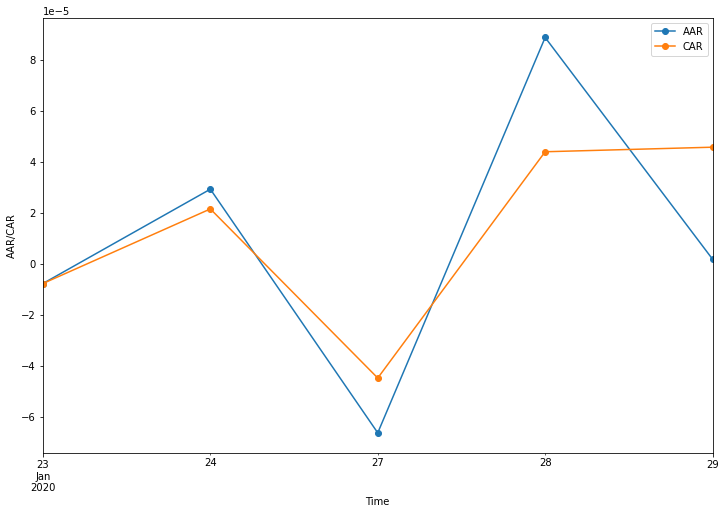

In [13]:
all_AR.plot(figsize = (12,8), marker = 'o')
plt.xlabel("Time")
plt.ylabel("AAR/CAR")
plt.show()

# T-test

In [ ]:
t = (abnormalReturns.mean(axis = 1)/len(tickers)) / abnormalReturns.std(axis = 1)
t

In [ ]:
all_AR["CAR"]/(np.sqrt(len(tickers))*abnormalReturns.std(axis = 1))